In [44]:
import pandas as pd
import numpy as np
from plotnine import *
import patchworklib as pw
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
os.chdir('D:\Studia\MoCaDR_proj1')

In [34]:
# SVD1
res_svd1 = pd.read_csv('Results/results_svd1.csv')
res_svd1_long = pd.melt(res_svd1, id_vars=['r'], value_vars=res_svd1.columns[1:])
best_r = res_svd1_long.iloc[res_svd1_long['value'].idxmin()]['r']
best_rmse = res_svd1_long['value'].min()
# SVD2
res_svd2 = pd.read_csv('Results/results_svd2.csv')
res_svd2_long = pd.melt(res_svd2, id_vars=['r'], value_vars=res_svd2.columns[1:])
best_r2 = res_svd2_long.iloc[res_svd2_long['value'].idxmin()]['r']
best_rmse2 = res_svd2_long['value'].min()
# NMF
res_nmf = pd.read_csv('Results/results_nmf.csv')
res_nmf_long = pd.melt(res_nmf, id_vars=['r'], value_vars=res_nmf.columns[1:])
best_r3 = res_nmf_long.iloc[res_nmf_long['value'].idxmin()]['r']
best_rmse3 = res_nmf_long['value'].min()

# Results for many r's

## SVD 1

In [18]:
plot_svd1_1 = ggplot(res_svd1_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD1") + \
    scale_color_discrete(labels=['0', 'Column means', 'Global mean', 'Weighted means', 'Row means'])
plot_svd1_2 = ggplot(res_svd1_long[res_svd1_long['variable'] != 'rmse_0']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD1") + \
    scale_color_discrete(labels=['Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_position='none')
plot_svd1_1.save('Report/fig/svd1_1.png')
plot_svd1_2.save('Report/fig/svd1_2.png')

# SVD2

In [37]:
plot_svd2_1 = ggplot(res_svd2_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD2") + \
    scale_color_discrete(labels=['0', 'Column means', 'Global mean', 'Weighted means', 'Row means'])
plot_svd2_2 = ggplot(res_svd2_long[res_svd2_long['variable'] != 'rmse_0']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD2") + \
    scale_color_discrete(labels=['Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_position='none')
plot_svd2_1.save('Report/fig/svd2_1.png')
plot_svd2_2.save('Report/fig/svd2_2.png')

# NMF

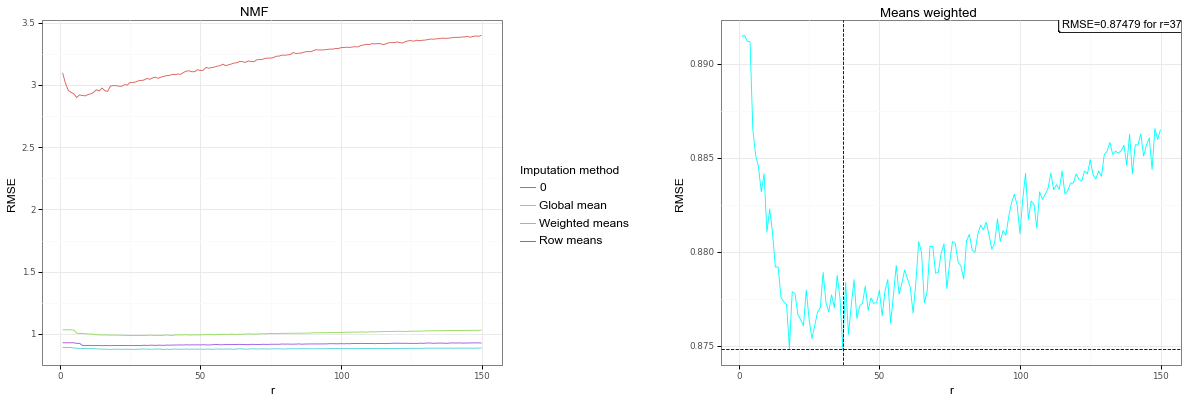

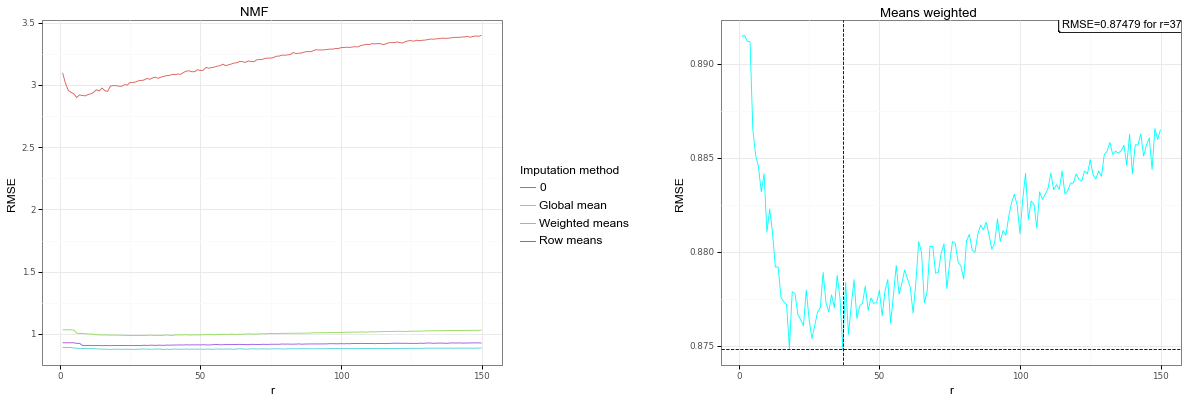

In [16]:
plot_nmf = ggplot(res_nmf_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="NMF") + \
    scale_color_discrete(labels=['0', 'Global mean', 'Weighted means', 'Row means'])
plot_nmf_w = ggplot(res_nmf_long[res_nmf_long['variable'] == 'rmse_means_weighted']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value'), color='cyan') + \
    geom_hline(yintercept=best_rmse3, linetype='dashed', color='black') + \
    geom_vline(xintercept=best_r3, linetype='dashed', color='black') + \
    geom_label(aes(x=float('inf'), y=float('inf')), label=f'RMSE={str(np.round(best_rmse3, 5))} for r={str(best_r3)}', va="top", ha="right") + \
    labs(y='RMSE', title='Means weighted')
p5 = pw.load_ggplot(plot_nmf)
p6 = pw.load_ggplot(plot_nmf_w)
plot_nmfw = p5|p6
plot_nmfw.savefig('Report/fig/nmf_all.png')

# Two-dimensional minimization: r, col_weight

In [46]:
# SVD1
res_svd1_3d = pd.read_csv('Results/results_r_w_svd1.csv')

## SVD1

In [57]:
n = 10
res_svd1_3d.loc[res_svd1_3d.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

In [79]:
X, Y, Z = res_svd1_3d.T.values

,r,col_weight,RMSE
423,15,0.33,0.873987
401,14,0.52,0.874244
489,16,0.58,0.874274
357,13,0.49,0.874449
424,15,0.34,0.874469
379,14,0.30,0.874475
467,16,0.36,0.874490
445,15,0.55,0.874498
466,16,0.35,0.874507
470,16,0.39,0.874532


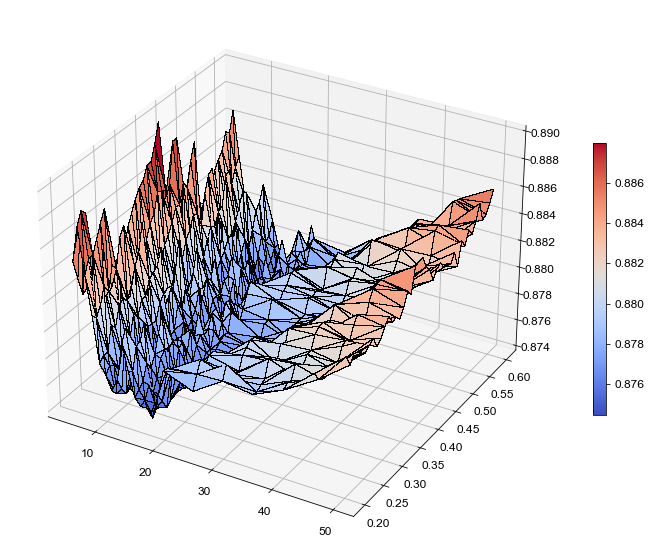

In [94]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm, edgecolor ='black', linewidth=0.005, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=20)

plt.savefig('Report/fig/svd1_r_w.png')

# Repeating

In [58]:
best_res = res_reps_long.iloc[res_reps_long.groupby(['rep', 'variable'])['value'].idxmin()]
best_res.drop('rep', axis=1, inplace=True)

In [75]:
best_res

,r,variable,value
1036,37,NMF,0.874794
10,11,SVD1,0.874430
507,8,SVD2,0.868461
1075,26,NMF,0.878625
64,15,SVD1,0.876858
556,7,SVD2,0.873775
1136,37,NMF,0.862671
115,16,SVD1,0.861971
607,8,SVD2,0.857800
1186,37,NMF,0.881929


In [73]:
boxplot_reps = ggplot(best_res, aes(y='r',  x='variable', group='variable')) + \
    theme_bw() + \
    stat_boxplot(geom='errorbar') + \
    geom_boxplot(aes(fill='variable')) + \
    theme(legend_position='none') + \
    labs(x='Method')

In [74]:
boxplot_reps.save('Report/fig/boxplot_reps.png')